## Example

In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anika\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
sid = SentimentIntensityAnalyzer()

In [3]:
message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''

In [4]:
scores = sid.polarity_scores(message_text)
scores

{'neg': 0.093, 'neu': 0.836, 'pos': 0.071, 'compound': -0.3804}

## Now let's try it on real data

In [5]:
# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Base
from collections import Counter
import re
import os

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

# Vector Representations
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv('./final3_airbnb.csv')

df.head()

,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,number_of_reviews,description,price,price_category
0,2008-08-18,10119,Entire home/apt,1125,4,$28.00,3,Mitte,2.0,Guesthouse,strict_14_with_grace_period,1,1.0,1.0,118,Great location! 30 of 75 sq meters. This wood...,6.0,super cheap
1,2008-10-19,10405,Entire home/apt,1125,62,$20.00,4,Prenzlauer Berg,2.0,Apartment,strict_14_with_grace_period,2,1.0,1.0,143,This beautiful first floor apartment is situa...,9.0,super cheap
2,2009-08-25,10405,Entire home/apt,14,6,$10.00,7,Prenzlauer Berg,7.0,Apartment,strict_14_with_grace_period,5,4.0,2.5,6,4 bedroom with very large windows and outstand...,18.0,cheap
3,2009-11-18,10437,Entire home/apt,1125,90,$0.00,2,Prenzlauer Berg,1.0,Apartment,strict_14_with_grace_period,1,0.0,1.0,23,The apartment is located on the upper second f...,7.0,super cheap
4,2009-12-03,10245,Private room,52,30,$13.00,2,Friedrichshain,2.0,Apartment,strict_14_with_grace_period,1,1.0,1.0,0,Hello future guests! We want to rent our cute ...,12.0,cheap


In [7]:
sid = SentimentIntensityAnalyzer()

In [8]:
text = df['description'][0]
text

'Great location!  30 of 75 sq meters. This wood floored/high ceiling typical Berlin "Altbau" section of an apartment consists of 1 simple large room, a small kitchen and a bathroom + shower. The apartment is in Mitte, close to Prenzlauer Berg/Mauerpark. Perfect for short visits, singles or couples. Your section is closed from the rest of the bigger flat wich is not noticeable. You will not be sharing your space. A+++ location! This „Einliegerwohnung“ is an extention of a larger apartment with a separate entrance, bathroom and kitchen. The door to the rest of the apartment is soundproof, hidden, locked and barely noticable (behind mirror in pictures). Your 30 sq meters are facing a quiet courtyard. This wood floored/high ceiling typical Berlin "Altbau" apartment consists of 1 large room with a large double bed, optionally with an extra matress for a 3rd guest), a small kitchen suitable for preparing simple meals, a bathroom + shower + bathtub and of course your own entrance (all linens 

In [9]:
scores = sid.polarity_scores(text)
scores

{'neg': 0.015, 'neu': 0.932, 'pos': 0.053, 'compound': 0.7936}

In [10]:
scores.get('compound')

0.7936

In [11]:
df['description'].shape[0]

9620

## Now let's try it on lots of real data

In [12]:
def text_iterate(dataframe, column):
    sid = SentimentIntensityAnalyzer()
    number = dataframe[column].shape[0]
    ratings = []
    x = 0
    while x < number:
        text = dataframe[column][x]
        scores = sid.polarity_scores(text)
        rating = scores.get('compound')
        ratings.append(rating)
        x = x + 1
    df['sentiment_ratings'] = ratings
        
text_iterate(df, 'description')

In [13]:
df.head()

,host_since,zipcode,room_type,maximum_nights,minimum_nights,extra_people,accommodates,neighbourhood,beds,property_type,cancellation_policy,guests_included,bedrooms,bathrooms,number_of_reviews,description,price,price_category,sentiment_ratings
0,2008-08-18,10119,Entire home/apt,1125,4,$28.00,3,Mitte,2.0,Guesthouse,strict_14_with_grace_period,1,1.0,1.0,118,Great location! 30 of 75 sq meters. This wood...,6.0,super cheap,0.7936
1,2008-10-19,10405,Entire home/apt,1125,62,$20.00,4,Prenzlauer Berg,2.0,Apartment,strict_14_with_grace_period,2,1.0,1.0,143,This beautiful first floor apartment is situa...,9.0,super cheap,0.9911
2,2009-08-25,10405,Entire home/apt,14,6,$10.00,7,Prenzlauer Berg,7.0,Apartment,strict_14_with_grace_period,5,4.0,2.5,6,4 bedroom with very large windows and outstand...,18.0,cheap,0.9690
3,2009-11-18,10437,Entire home/apt,1125,90,$0.00,2,Prenzlauer Berg,1.0,Apartment,strict_14_with_grace_period,1,0.0,1.0,23,The apartment is located on the upper second f...,7.0,super cheap,0.9217
4,2009-12-03,10245,Private room,52,30,$13.00,2,Friedrichshain,2.0,Apartment,strict_14_with_grace_period,1,1.0,1.0,0,Hello future guests! We want to rent our cute ...,12.0,cheap,0.9938


## Most Important Features (target = price)

In [14]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def wrangle(X):
    X = X.copy()
    
    X = df.drop(['price_category'], axis = 1)

    return X

# Read data
trainval = df

# Split into train & validation sets
# All rows for a given tube_assembly_id should go in either train or validation
train_rentals, val_rentals = train_test_split(trainval, random_state=42)

# Wrangle train, validation, and test sets
train = wrangle(train_rentals)
val = wrangle(val_rentals)

# Arrange X matrix and y vector (log-transformed)
target = 'price'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [16]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 0.40894135326563497


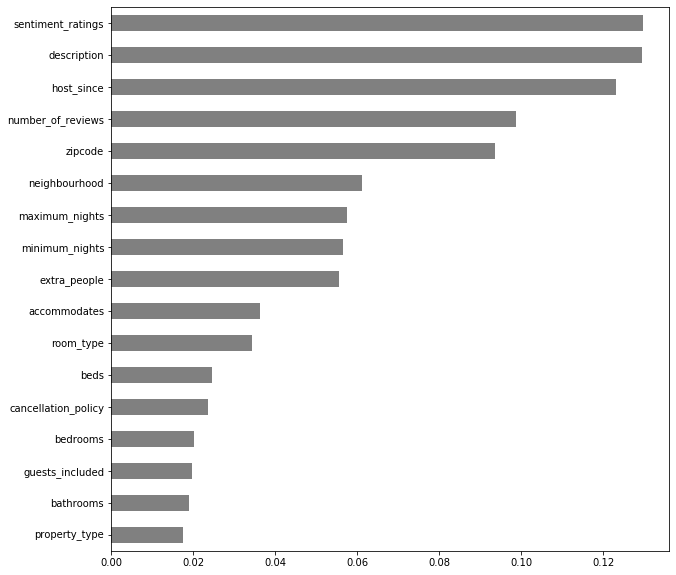

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey');

## Most Important Features (target = number of reviews)

In [18]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def wrangle(X):
    X = X.copy()

    return X

# Read data
trainval = df

# Split into train & validation sets
# All rows for a given tube_assembly_id should go in either train or validation
train_rentals, val_rentals = train_test_split(trainval, random_state=42)

# Wrangle train, validation, and test sets
train = wrangle(train_rentals)
val = wrangle(val_rentals)

# Arrange X matrix and y vector (log-transformed)
target = 'number_of_reviews'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [19]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 1.2586859011372618


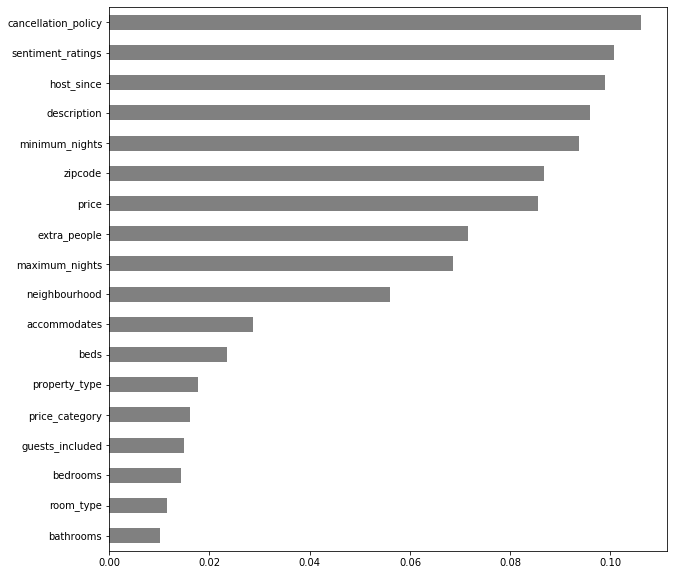

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey');

## Can we predict price based on sentiment?

In [43]:
df['price'].corr(df['sentiment_ratings'])

0.03359619904455634

That's not a very high correlation at all... Let's try something else

## Can we predict the number of reviews we'll get based on sentiment?

In [44]:
df['number_of_reviews'].corr(df['sentiment_ratings'])

0.05507442468081073

Hmm... Still not very high. Let's try something, just to be sure

In [45]:
df['sentiment_ratings'].corr(df['number_of_reviews'])

0.055074424680810724

Exactly the same. As suspected, but still good to know

## What about a tool that uses sentiment analysis to report to a user how positive their description is?

In [ ]:
'''
To do this, I would need to put my prediction function into a Flask app
It's actually pretty damn similar to the TwitOff app, now that I think about it, so it shouldn't be that hard,
as long as the team is on board.
Also a good way for me to confirm to myself that I do have the Unit 3 abilities I was supposed to be tested on,
but wasn't.
'''